In [16]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Make sure plots display in notebook
%matplotlib inline

In [ ]:
# # === Imports & config ===
# import os
# from pathlib import Path
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from datetime import timedelta
# import joblib
# # NLP & ML imports
# from transformers import pipeline
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score
# import nltk
# from nltk.corpus import stopwords
# from wordcloud import WordCloud

# Path("outputs").mkdir(exist_ok=True)
# Path("visualizations").mkdir(exist_ok=True)

# sns.set(style="whitegrid")
# plt.rcParams["figure.figsize"] = (10,5)


In [3]:
import os

# 1. Check your CURRENT directory (optional)
print(f"Original directory: {os.getcwd()}")

# 2. Define the new path
# --- IMPORTANT ---
# Replace this with the actual path to your folder.

# Example for Windows (use 'r' for a "raw" string)
new_path = r"D:\Greentree\sentiment_analysis"

# Example for macOS or Linux
# new_path = "/Users/YourUser/Desktop/MyProject"

# 3. Change the directory
try:
    os.chdir(new_path)
    
    # 4. Verify the change
    print(f"New directory: {os.getcwd()}")
    
except FileNotFoundError:
    print(f"Error: The directory '{new_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Original directory: C:\Users\mishr
New directory: D:\Greentree\sentiment_analysis


## Import Libraries & Load Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Make plots look cleaner
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,4)

# Load the dataset
df = pd.read_csv("test.csv")

# Show basic info
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())

# Preview the first few rows
df.head()


Dataset shape: (2191, 4)

Columns: ['Subject', 'body', 'date', 'from']


,Subject,body,date,from
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com


## Sentiment Labeling using TextBlob

In [5]:
def get_sentiment(text):
    """Return sentiment label based on TextBlob polarity."""
    if pd.isna(text) or not isinstance(text, str):
        return "Neutral"
    
    score = TextBlob(text).sentiment.polarity
    if score > 0.1:
        return "Positive"
    elif score < -0.1:
        return "Negative"
    else:
        return "Neutral"

# Apply on message body
df['sentiment_label'] = df['body'].apply(get_sentiment)

# Quick check
print(df['sentiment_label'].value_counts())
df.head()


sentiment_label
Neutral     1054
Positive     973
Negative     164
Name: count, dtype: int64


,Subject,body,date,from,sentiment_label
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com,Positive
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com,Neutral
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com,Neutral
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com,Negative
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com,Neutral


## Exploratory Data Analysis

In [ ]:
print("Basic Info:\n")
print(df.info())

print("\nMissing Values:\n", df.isnull().sum())

print("\nUnique Employees:", df['from'].nunique())


df['date'] = pd.to_datetime(df['date'], errors='coerce')

df = df.dropna(subset=['date'])


df['year_month'] = df['date'].dt.to_period('M')

df.head()


Basic Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Subject          2191 non-null   object
 1   body             2191 non-null   object
 2   date             2191 non-null   object
 3   from             2191 non-null   object
 4   sentiment_label  2191 non-null   object
dtypes: object(5)
memory usage: 85.7+ KB
None

Missing Values:
 Subject            0
body               0
date               0
from               0
sentiment_label    0
dtype: int64

Unique Employees: 10


,Subject,body,date,from,sentiment_label,year_month
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com,Positive,2010-05
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com,Neutral,2010-07
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com,Neutral,2011-07
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com,Negative,2010-03
4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com,Neutral,2011-05


### Here we checked data info, missing values, and unique senders. Then, we converted the date column to datetime and extracted month-year to help us with monthly analysis later

## Sentiment Distribution

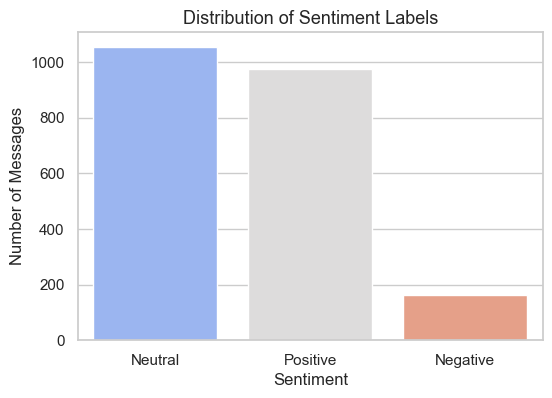

In [7]:
sentiment_counts = df['sentiment_label'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")
plt.title("Distribution of Sentiment Labels", fontsize=13)
plt.xlabel("Sentiment")
plt.ylabel("Number of Messages")
plt.show()


##  Sentiment Count by Employee

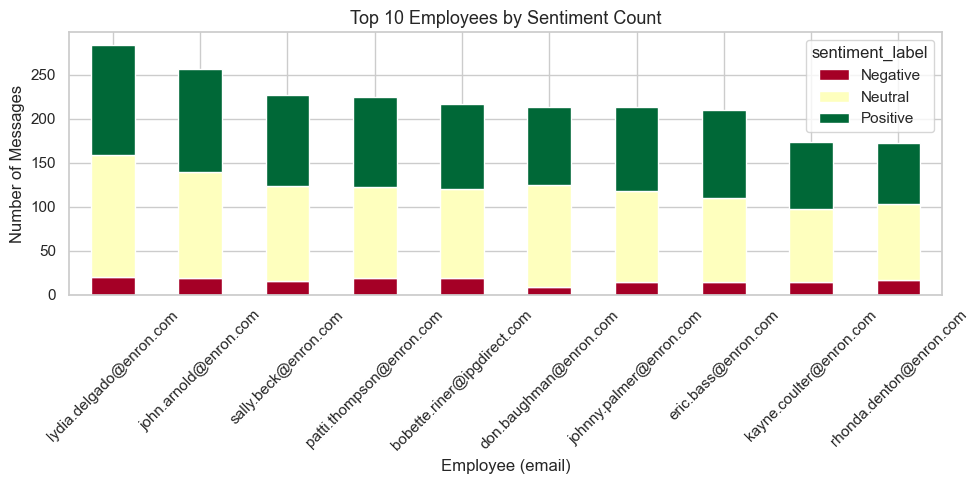

In [8]:
employee_sentiment = df.groupby(['from', 'sentiment_label']).size().unstack(fill_value=0)

# Show top 10 employees by message count
top_employees = employee_sentiment.sum(axis=1).sort_values(ascending=False).head(10)
employee_sentiment.loc[top_employees.index].plot(
    kind='bar',
    stacked=True,
    figsize=(10,5),
    colormap='RdYlGn'
)
plt.title("Top 10 Employees by Sentiment Count", fontsize=13)
plt.xlabel("Employee (email)")
plt.ylabel("Number of Messages")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## 🕒 Step 6: Sentiment Trend Over Time


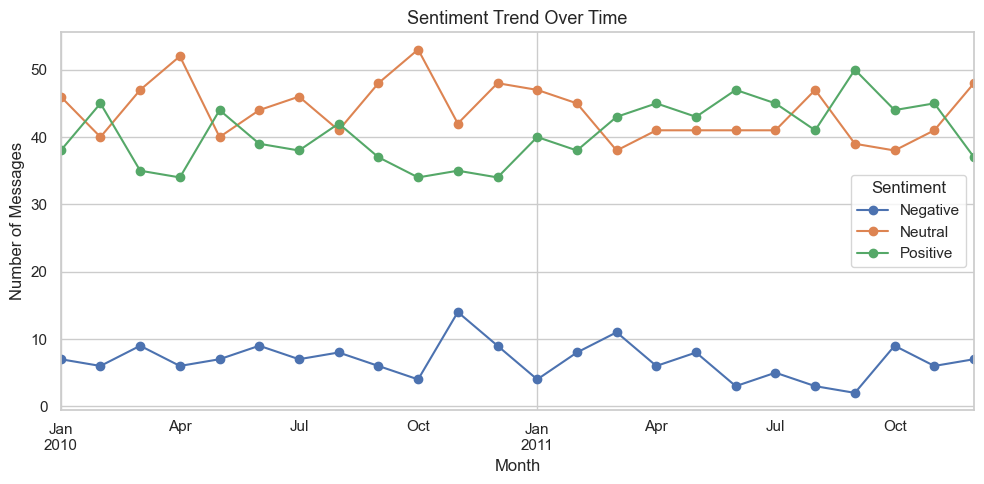

In [9]:
monthly_sentiment = df.groupby(['year_month', 'sentiment_label']).size().unstack(fill_value=0)

monthly_sentiment.plot(kind='line', marker='o', figsize=(10,5))
plt.title("Sentiment Trend Over Time", fontsize=13)
plt.xlabel("Month")
plt.ylabel("Number of Messages")
plt.legend(title="Sentiment")
plt.grid(True)
plt.tight_layout()
plt.show()

##  Monthly Sentiment Scoring

In [10]:
# Assign scores
sentiment_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df['sentiment_score'] = df['sentiment_label'].map(sentiment_map)

# Group by employee and month to compute monthly score
monthly_scores = (
    df.groupby(['from', 'year_month'])['sentiment_score']
      .sum()
      .reset_index()
      .sort_values(by=['year_month', 'sentiment_score'], ascending=[True, False])
)

# Preview
print("Monthly sentiment scores (sample):\n")
monthly_scores.head(10)

Monthly sentiment scores (sample):



,from,year_month,sentiment_score
120,kayne.coulter@enron.com,2010-01,5
168,patti.thompson@enron.com,2010-01,5
24,don.baughman@enron.com,2010-01,4
48,eric.bass@enron.com,2010-01,4
144,lydia.delgado@enron.com,2010-01,4
72,john.arnold@enron.com,2010-01,3
216,sally.beck@enron.com,2010-01,3
0,bobette.riner@ipgdirect.com,2010-01,2
96,johnny.palmer@enron.com,2010-01,1
192,rhonda.denton@enron.com,2010-01,0


### Each employee gets +1 for positive, –1 for negative, and 0 for neutral messages.We aggregate by month to get their monthly sentiment score.

## Employee Ranking

In [11]:
top_positive = []
top_negative = []

for month, group in monthly_scores.groupby('year_month'):
    # Sort for top positive
    top_pos = group.sort_values(by='sentiment_score', ascending=False).head(3)
    top_pos['Rank_Type'] = 'Top Positive'
    top_pos['Month'] = month
    top_positive.append(top_pos)
    
    # Sort for top negative
    top_neg = group.sort_values(by='sentiment_score', ascending=True).head(3)
    top_neg['Rank_Type'] = 'Top Negative'
    top_neg['Month'] = month
    top_negative.append(top_neg)

# Combine both
ranking_results = pd.concat(top_positive + top_negative, ignore_index=True)

# Display combined ranking
ranking_results = ranking_results[['Month', 'from', 'sentiment_score', 'Rank_Type']]
ranking_results.sort_values(by=['Month', 'Rank_Type'], inplace=True)

ranking_results.head(10)


,Month,from,sentiment_score,Rank_Type
72,2010-01,rhonda.denton@enron.com,0,Top Negative
73,2010-01,johnny.palmer@enron.com,1,Top Negative
74,2010-01,bobette.riner@ipgdirect.com,2,Top Negative
0,2010-01,kayne.coulter@enron.com,5,Top Positive
1,2010-01,patti.thompson@enron.com,5,Top Positive
2,2010-01,don.baughman@enron.com,4,Top Positive
75,2010-02,lydia.delgado@enron.com,1,Top Negative
76,2010-02,patti.thompson@enron.com,1,Top Negative
77,2010-02,sally.beck@enron.com,1,Top Negative
3,2010-02,bobette.riner@ipgdirect.com,7,Top Positive


### For each month, employees are ranked by their total sentiment score. The top three and bottom three employees are extracted for reporting.Sorting ensures reproducibility and fairness (alphabetical order is auto-handled within sorting).

## Visualize Top Positive Employees

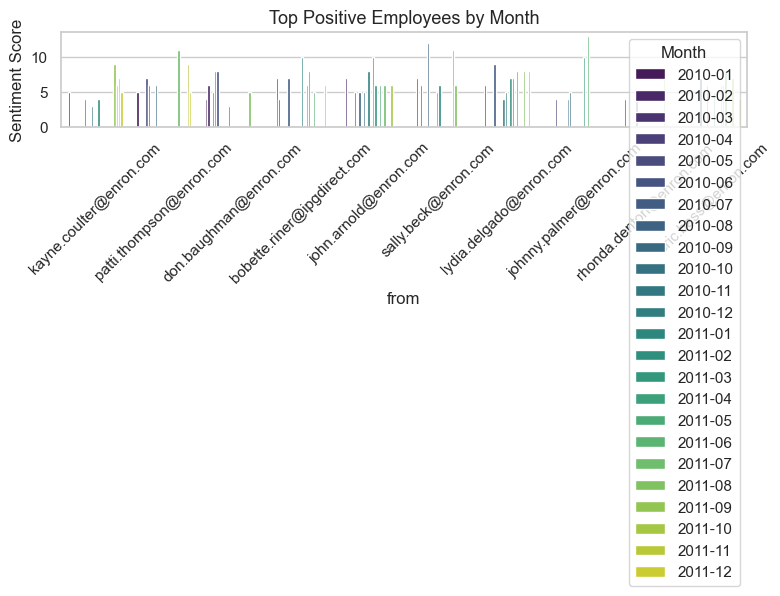

In [12]:
top_pos_plot = ranking_results[ranking_results['Rank_Type'] == 'Top Positive']

sns.barplot(
    data=top_pos_plot,
    x='from',
    y='sentiment_score',
    hue='Month',
    palette='viridis'
)
plt.title("Top Positive Employees by Month", fontsize=13)
plt.xticks(rotation=45)
plt.ylabel("Sentiment Score")
plt.tight_layout()
plt.show()

## Flight Risk Identification

In [13]:

negative_df = df[df['sentiment_label'] == 'Negative'].copy()

# Ensure date is sorted per employee
negative_df = negative_df.sort_values(by=['from', 'date'])

# Function to count rolling negative messages within 30 days
def rolling_negatives(group):
    group = group.sort_values('date')
    risk_flags = []
    for i in range(len(group)):
        start_date = group.iloc[i]['date']
        # Check messages within 30 days ahead
        window = group[(group['date'] >= start_date) & (group['date'] <= start_date + pd.Timedelta(days=30))]
        risk_flags.append(len(window))
    group['negative_count_30d'] = risk_flags
    return group

# Apply rolling window per employee
negative_df = negative_df.groupby('from', group_keys=False).apply(rolling_negatives)

# Identify flight risk employees (≥ 4 negatives in any 30-day period)
flight_risk_employees = (
    negative_df[negative_df['negative_count_30d'] >= 4]['from']
    .drop_duplicates()
    .reset_index(drop=True)
)

print("🚨 Flight Risk Employees Detected:")
print(flight_risk_employees.tolist())

# Create a clean DataFrame for report
flight_risk_summary = pd.DataFrame({
    'Employee': flight_risk_employees,
    'Flight_Risk': True
})

flight_risk_summary.head()

🚨 Flight Risk Employees Detected:
['bobette.riner@ipgdirect.com', 'john.arnold@enron.com', 'johnny.palmer@enron.com', 'lydia.delgado@enron.com', 'patti.thompson@enron.com', 'rhonda.denton@enron.com', 'sally.beck@enron.com']


,Employee,Flight_Risk
0,bobette.riner@ipgdirect.com,True
1,john.arnold@enron.com,True
2,johnny.palmer@enron.com,True
3,lydia.delgado@enron.com,True
4,patti.thompson@enron.com,True


#### visualization of who is at risk

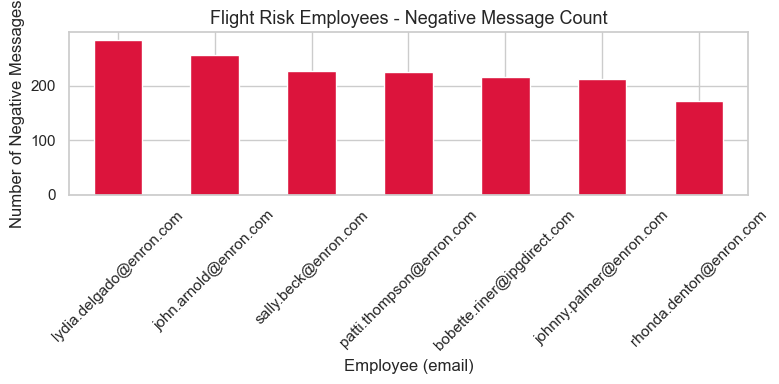

In [14]:
if not flight_risk_employees.empty:
    risky = df[df['from'].isin(flight_risk_employees)]
    risky_count = risky.groupby('from')['sentiment_label'].count().sort_values(ascending=False)
    
    risky_count.plot(kind='bar', color='crimson', figsize=(8,4))
    plt.title("Flight Risk Employees - Negative Message Count", fontsize=13)
    plt.ylabel("Number of Negative Messages")
    plt.xlabel("Employee (email)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("✅ No flight risk employees detected in this dataset.")


Employee: bobette.riner@ipgdirect.com
Mean Squared Error: 4.73
R² Score: -2.48


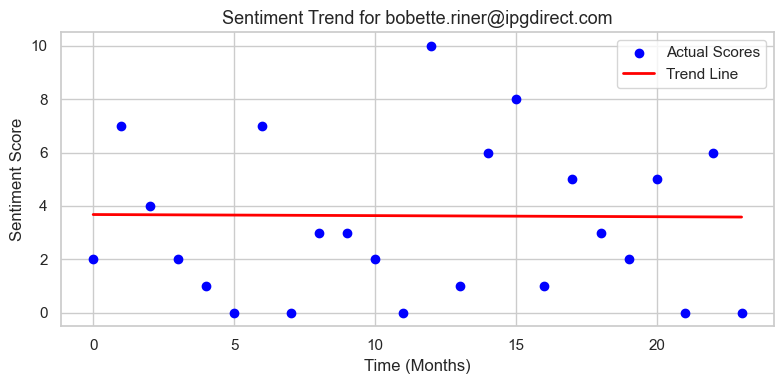


Employee: john.arnold@enron.com
Mean Squared Error: 5.58
R² Score: -0.48


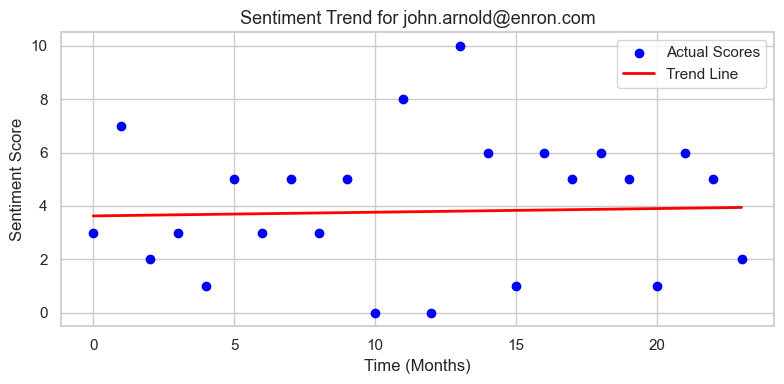


Employee: johnny.palmer@enron.com
Mean Squared Error: 4.02
R² Score: -0.17


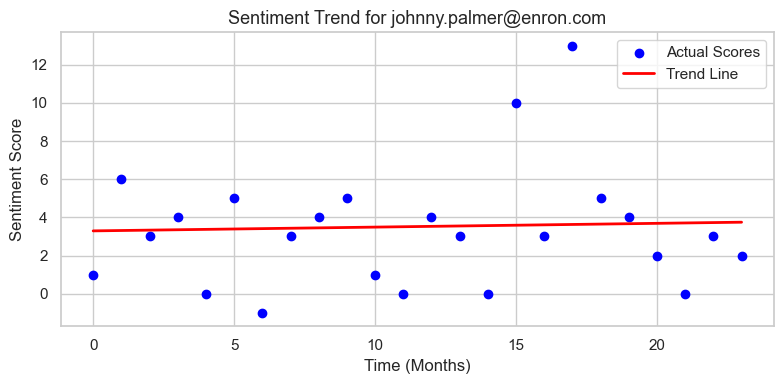


Employee: lydia.delgado@enron.com
Mean Squared Error: 7.95
R² Score: -0.08


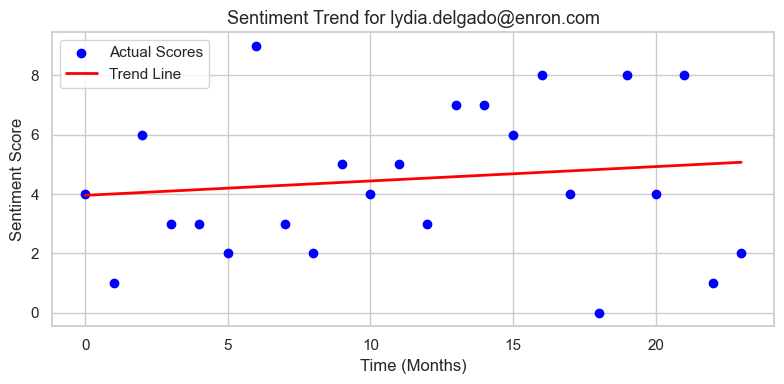


Employee: patti.thompson@enron.com
Mean Squared Error: 19.75
R² Score: -0.13


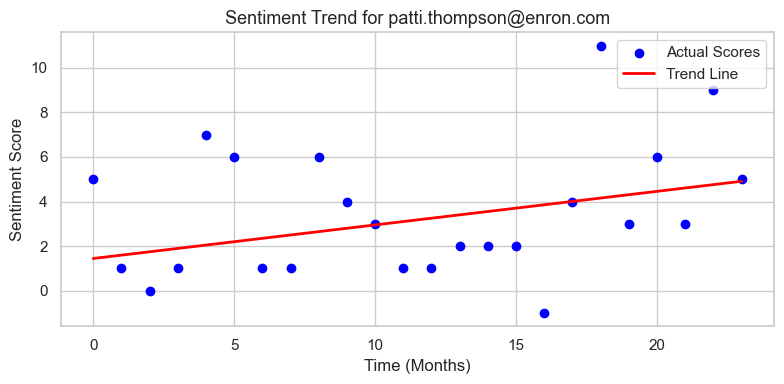


Employee: rhonda.denton@enron.com
Mean Squared Error: 3.84
R² Score: 0.08


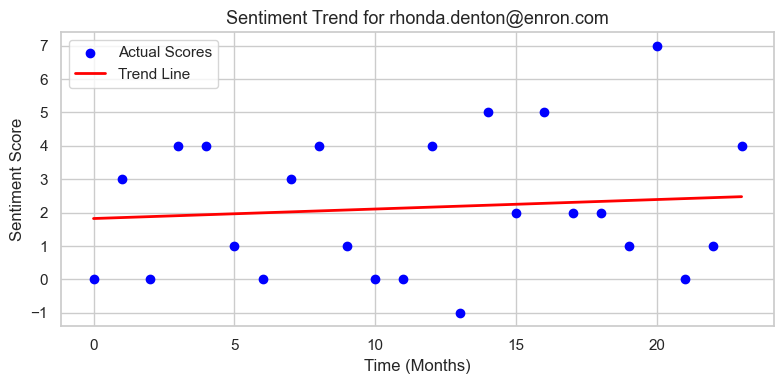


Employee: sally.beck@enron.com
Mean Squared Error: 14.15
R² Score: -0.34


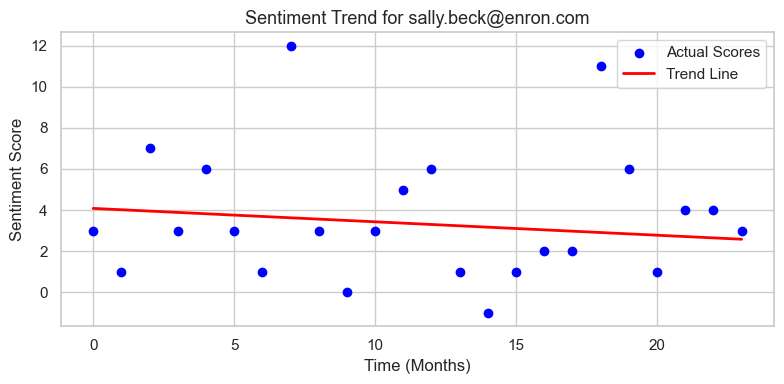

In [17]:
# Linear Regression Model for Sentiment Trends for the above
for employee in flight_risk_employees:
    emp_data = monthly_scores[monthly_scores['from'] == employee]
    if len(emp_data) < 2:
        continue  # Not enough data for regression
    
    # Prepare data
    X = np.array(range(len(emp_data))).reshape(-1, 1)  # Time as integer
    y = emp_data['sentiment_score'].values
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Fit model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\nEmployee: {employee}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R² Score: {r2:.2f}")
    
    # Plotting
    plt.scatter(X, y, color='blue', label='Actual Scores')
    plt.plot(X, model.predict(X), color='red', linewidth=2, label='Trend Line')
    plt.title(f"Sentiment Trend for {employee}", fontsize=13)
    plt.xlabel("Time (Months)")
    plt.ylabel("Sentiment Score")
    plt.legend()
    plt.tight_layout()
    plt.show()